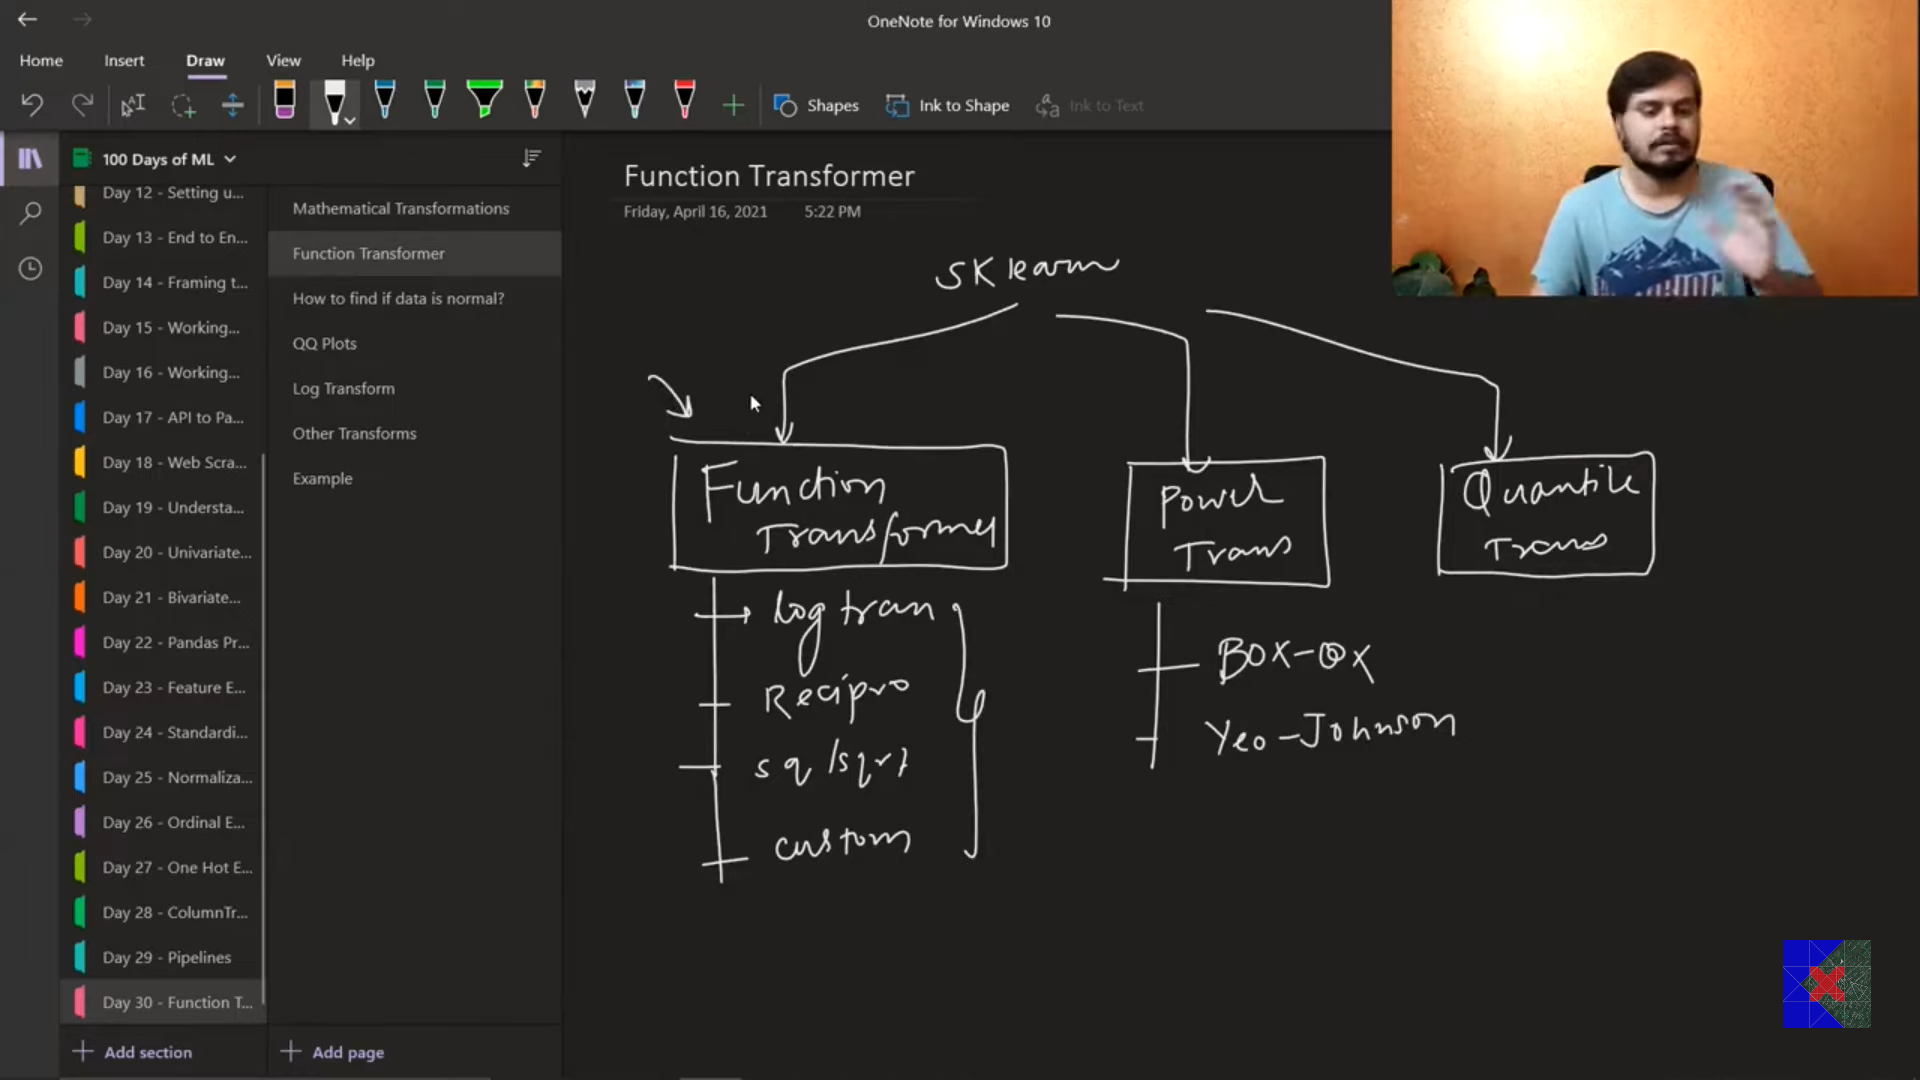

In [ ]:
Function Tranformer - just apply any mathmatical operation on column, to create the normal distribution

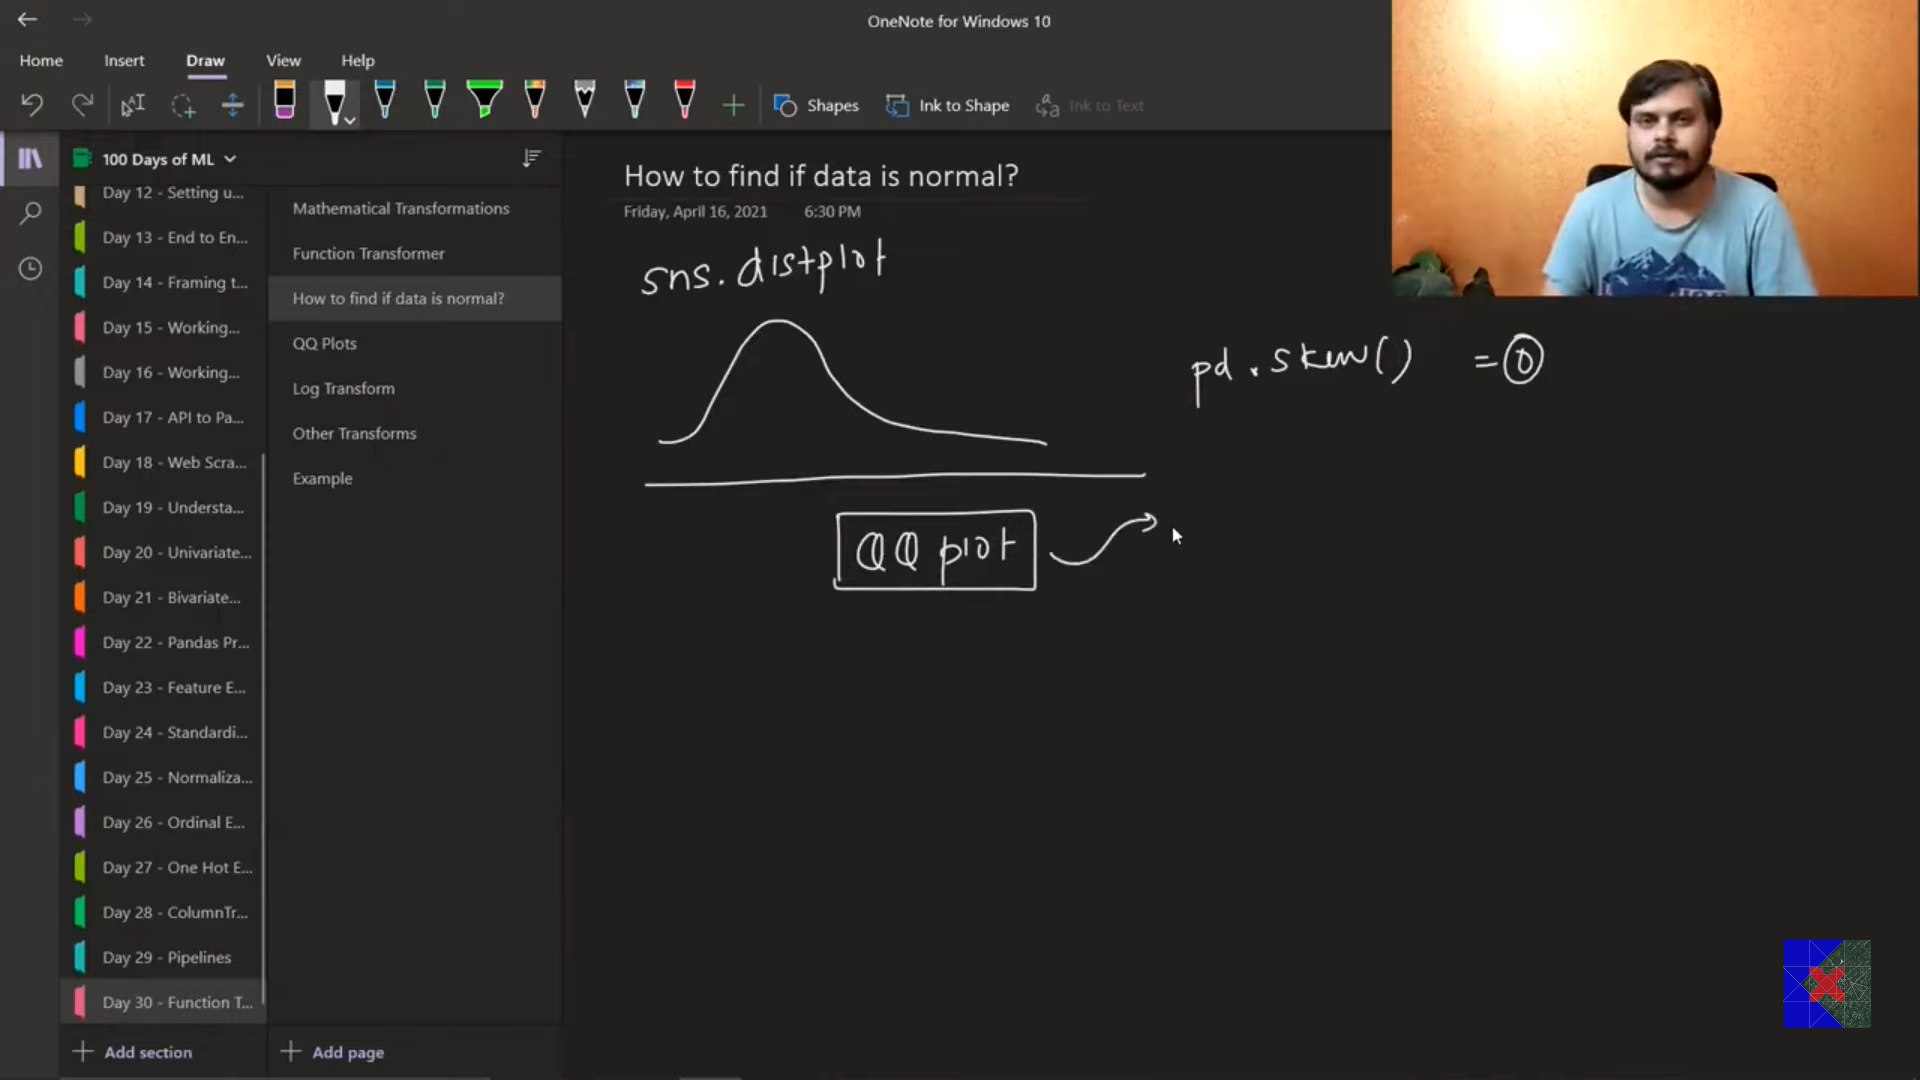

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats as stats 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier

from sklearn.preprocessing import FunctionTransformer
from sklearn.compose import ColumnTransformer

In [4]:
df = pd.read_csv('/Data/train.csv',usecols=['Age','Fare','Survived']) 

In [8]:
df['Age'].fillna(df['Age'].mean(), inplace=True)  

In [9]:
df.head() 

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [11]:
x = df.iloc[:,1:] 
y = df.iloc[:,0]  

In [12]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=42) 

C:\Users\hp\AppData\Local\Temp\ipykernel_14924\4034048076.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(xtrain['Age'])


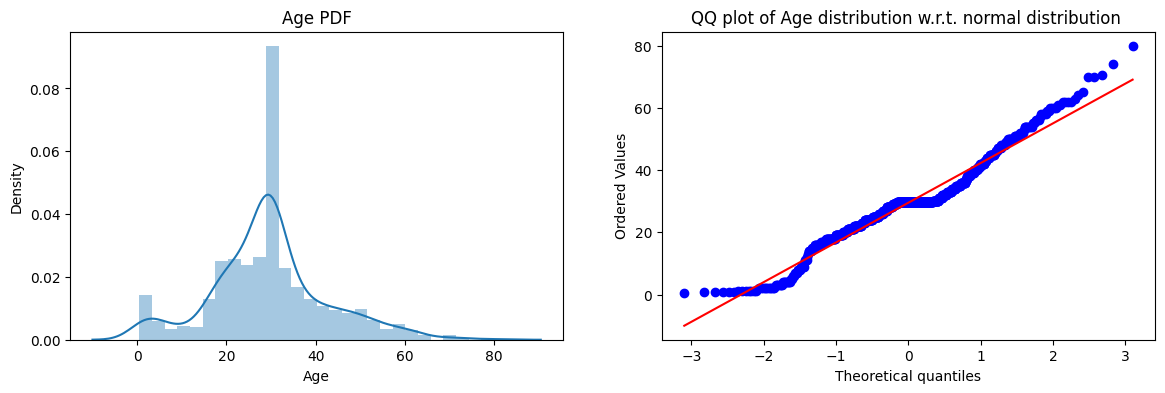

In [19]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.distplot(xtrain['Age'])
plt.title('Age PDF')

plt.subplot(122)
stats.probplot(xtrain['Age'],dist='norm',plot=plt)
plt.title('QQ plot of Age distribution w.r.t. normal distribution ') 

plt.show() 

- It is close to normal distribution

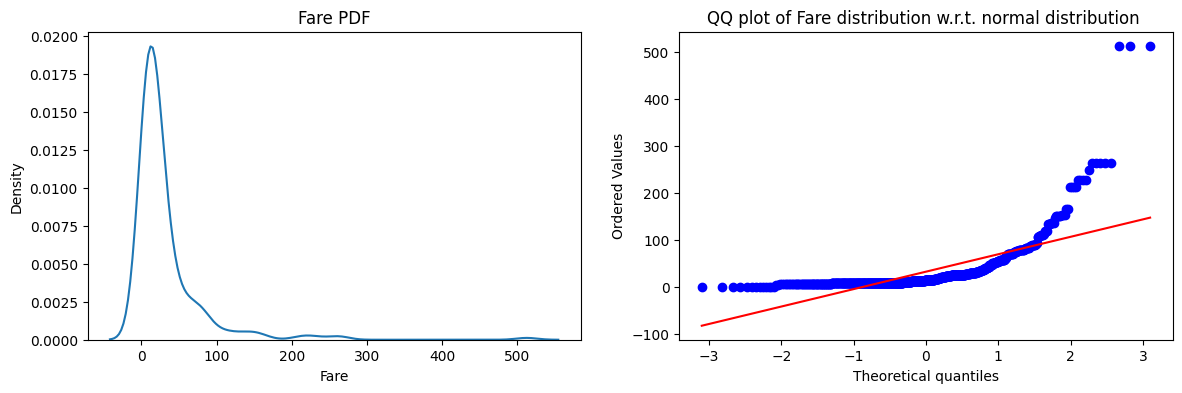

In [22]:
plt.figure(figsize=(14,4))
plt.subplot(121)
sns.kdeplot(xtrain['Fare'])
plt.title('Fare PDF')

plt.subplot(122)
stats.probplot(xtrain['Fare'],dist='norm',plot=plt)
plt.title('QQ plot of Fare distribution w.r.t. normal distribution ')

plt.show() 

- it is right skewed
- so we use log tranformation for converting into normal distribution, for better performance,good accuracy in ml algorithm 

In [24]:
lgreg= LogisticRegression() 
dtclf = DecisionTreeClassifier() 

In [27]:
lgreg.fit(xtrain,ytrain)
dtclf.fit(xtrain,ytrain) 

pred_lr = lgreg.predict(xtest) 
pred_dtc = dtclf.predict(xtest) 

print("Accuracy LR",accuracy_score(ytest,pred_lr))
print("Accuracy DT",accuracy_score(ytest,pred_dtc)) 

Accuracy LR 0.6480446927374302
Accuracy DT 0.659217877094972


### Performing Transformation 
- log transform

In [31]:
trf = FunctionTransformer(func=np.log1p) 

X_train_transformed = trf.fit_transform(xtrain)
X_test_transformed = trf.transform(xtest) 

In [36]:
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed,ytrain)
clf2.fit(X_train_transformed,ytrain)
    
y_pred = clf.predict(X_test_transformed)
y_pred1 = clf2.predict(X_test_transformed)
    
print("Accuracy LR",accuracy_score(ytest,y_pred))
print("Accuracy DT",accuracy_score(ytest,y_pred1)) 

Accuracy LR 0.6815642458100558
Accuracy DT 0.6871508379888268


In [38]:
X_transformed = trf.fit_transform(x)

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed,y,scoring='accuracy',cv=10))) 

LR 0.678027465667915
DT 0.6588264669163546


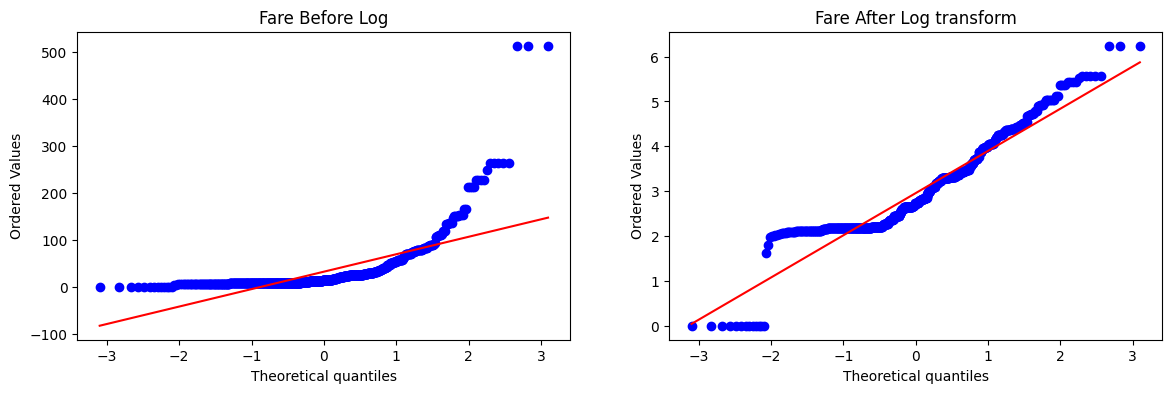

In [40]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(xtrain['Fare'], dist="norm", plot=plt)
plt.title('Fare Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Fare'], dist="norm", plot=plt)
plt.title('Fare After Log transform')

plt.show() 

- Distribution become better 

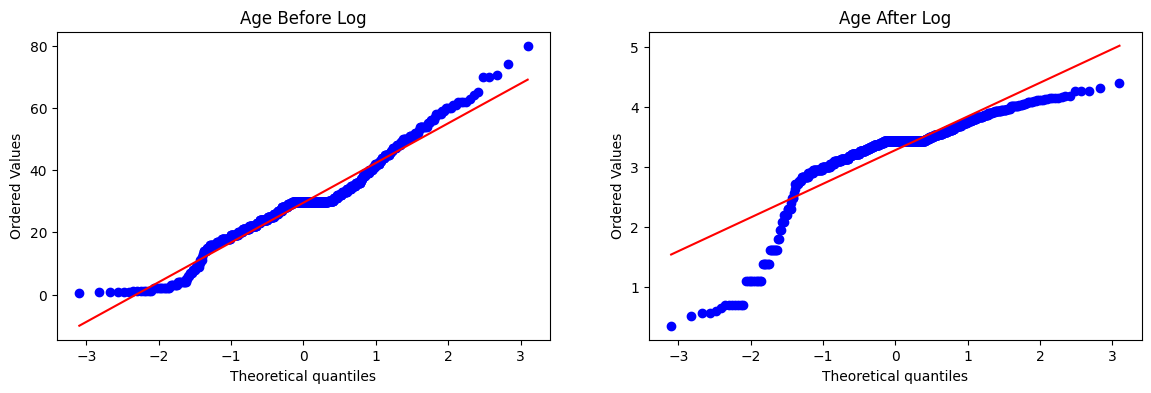

In [41]:
plt.figure(figsize=(14,4))

plt.subplot(121)
stats.probplot(xtrain['Age'], dist="norm", plot=plt)
plt.title('Age Before Log')

plt.subplot(122)
stats.probplot(X_train_transformed['Age'], dist="norm", plot=plt)
plt.title('Age After Log')

plt.show() 

- After transformation distribution become left skewed -- no need to apply log transformation 

In [45]:
# Now we applying log tranformation on Age column only  

trf2 = ColumnTransformer([('log',FunctionTransformer(np.log1p),['Fare'])],remainder='passthrough')

X_train_transformed2 = trf2.fit_transform(xtrain)
X_test_transformed2 = trf2.transform(xtest) 

clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

clf.fit(X_train_transformed2,ytrain)
clf2.fit(X_train_transformed2,ytrain)
    
y_pred = clf.predict(X_test_transformed2)
y_pred2 = clf2.predict(X_test_transformed2)
    
print("Accuracy LR",accuracy_score(ytest,y_pred))
print("Accuracy DT",accuracy_score(ytest,y_pred2)) 

Accuracy LR 0.6703910614525139
Accuracy DT 0.659217877094972


In [46]:
X_transformed2 = trf2.fit_transform(x)
 
clf = LogisticRegression()
clf2 = DecisionTreeClassifier()

print("LR",np.mean(cross_val_score(clf,X_transformed2,y,scoring='accuracy',cv=10)))
print("DT",np.mean(cross_val_score(clf2,X_transformed2,y,scoring='accuracy',cv=10))) 

LR 0.6712609238451936
DT 0.6565917602996254


In [51]:
df 

,Survived,Age,Fare
0,0,22.000000,7.2500
1,1,38.000000,71.2833
2,1,26.000000,7.9250
3,1,35.000000,53.1000
4,0,35.000000,8.0500
...,...,...,...
886,0,27.000000,13.0000
887,1,19.000000,30.0000
888,0,29.699118,23.4500
889,1,26.000000,30.0000


If you only need to apply a log transformation to a single column fare in your DataFrame df, then using `np.log(df['fare']) `would be sufficient. This will apply a log transformation to the fare column and return a new Series object containing the transformed values.

However, if you need to apply multiple transformations to different columns in the same DataFrame, then using ColumnTransformer 

`trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')`
    
`X_trans = trf.fit_transform(X)`

would be more appropriate. This allows you to specify multiple transformations to be applied to specific columns, and also provides more flexibility in how you handle any remaining columns that you do not want to transform.

In [52]:
# Create a function for all other transform, so we use it again and again  
def apply_transform(transform):
    X = df.iloc[:,1:3]
    y = df.iloc[:,0]
    
    trf = ColumnTransformer([('log',FunctionTransformer(transform),['Fare'])],remainder='passthrough')
    
    X_trans = trf.fit_transform(X)
    
    clf = LogisticRegression()
    
    print("Accuracy",np.mean(cross_val_score(clf,X_trans,y,scoring='accuracy',cv=10)))
    
    plt.figure(figsize=(14,4))

    plt.subplot(121)
    stats.probplot(X['Fare'], dist="norm", plot=plt)
    plt.title('Fare Before Transform')

    plt.subplot(122)
    stats.probplot(X_trans[:,0], dist="norm", plot=plt)
    plt.title('Fare After Transform')

    plt.show() 

Accuracy 0.6442446941323345


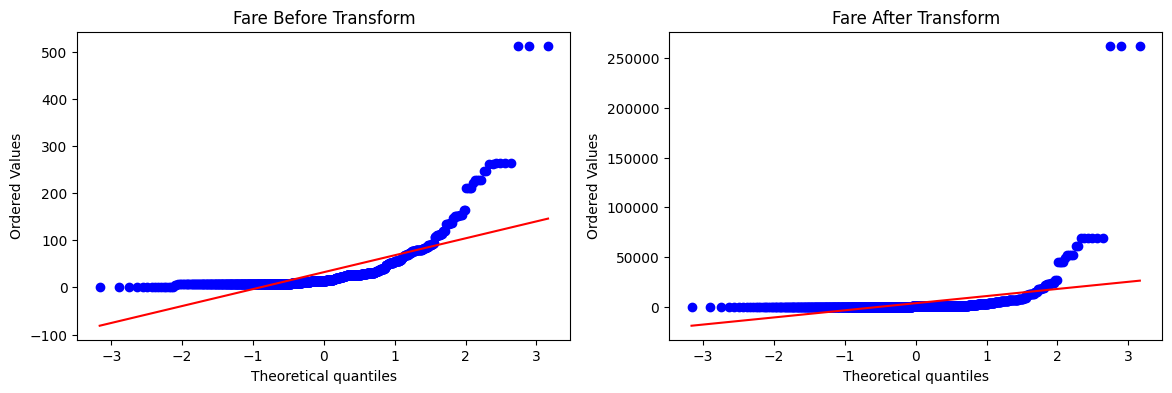

In [55]:
# Square transform
apply_transform(lambda x: x**2)  

Accuracy 0.6589013732833957


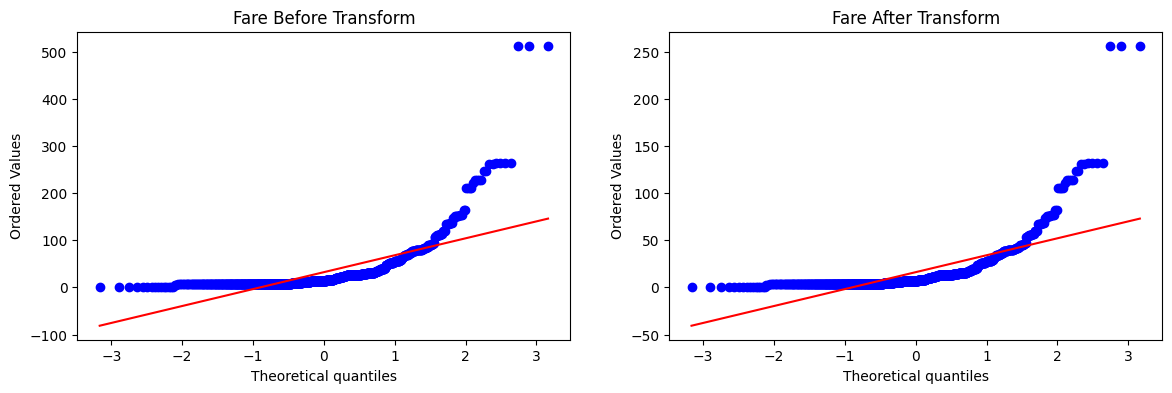

In [56]:
# Squareroot transform
apply_transform(lambda x: x**1/2)  

Accuracy 0.61729088639201


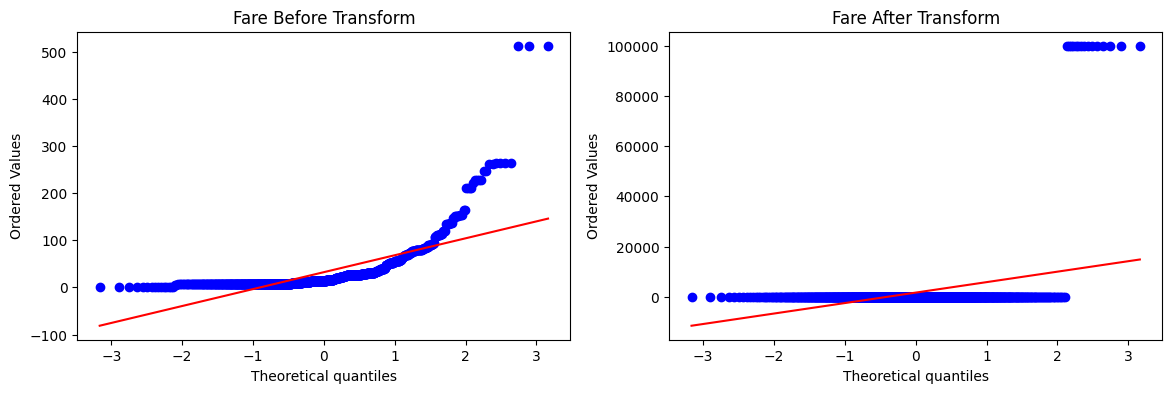

In [59]:
# Reciprocal transform
apply_transform(lambda x: 1/(x+0.00001))   

Accuracy 0.616167290886392


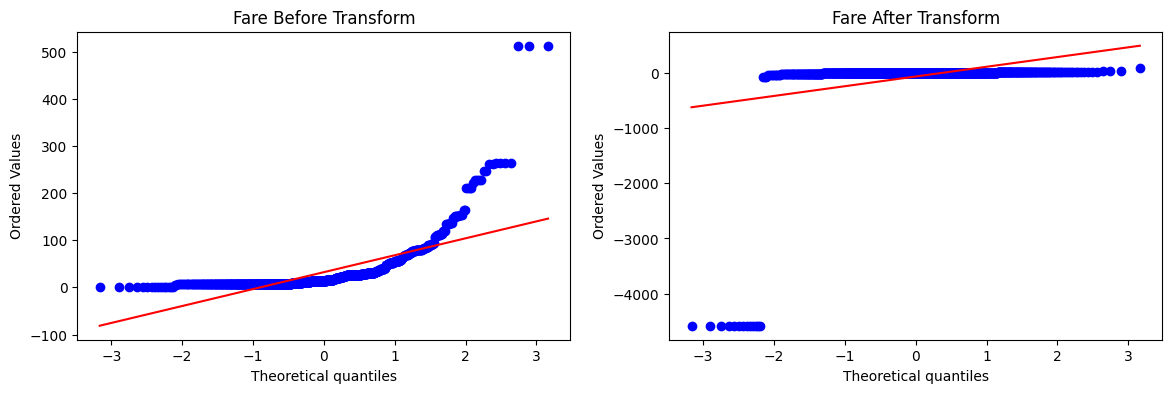

In [61]:
# pass any function - custom logic
apply_transform(lambda x: np.tan(x))    